### ***Import Necessary Modules***

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
data_train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data_train.shape

(1460, 81)

In [4]:
data_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data_train=data_train.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])

### ***List Of Columns Having NULL Values***

In [9]:
cols=data_train.columns[data_train.isnull().any()].tolist()
cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [10]:
df1=pd.DataFrame()
df2=pd.DataFrame()
l=[]
r=[]
for i in data_train:
  if(np.dtype(data_train[i])=='object'):
    l.append(i)
    df1[i]=data_train[i]
  else:
    df2[i]=data_train[i]
    if(np.dtype(data_train[i])=='int64'):
      r.append(i)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

### ***Using Iterative Imputer***

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df2)
imputed = pd.DataFrame(imp_mean.transform(df2))
imputed.columns = df2.columns
df2=imputed
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [13]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [14]:
df3=pd.get_dummies(df1)

In [15]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 239 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: uint8(239)
memory usage: 340.9 KB


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
data_train=df3.join(df2)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 276 entries, MSZoning_C (all) to SalePrice
dtypes: float64(37), uint8(239)
memory usage: 762.9 KB


<AxesSubplot:>

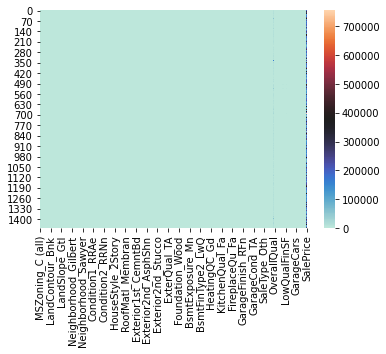

In [17]:
sns.heatmap(data=data_train,cmap='icefire')

In [18]:
data_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0,0,0,1,0,0,1,0,0,0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,0,0,0,1,0,0,1,1,0,0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0,0,0,1,0,0,1,1,0,0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,0,0,0,1,0,0,1,1,0,0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [19]:
data_train.isnull().sum()

MSZoning_C (all)    0
MSZoning_FV         0
MSZoning_RH         0
MSZoning_RL         0
MSZoning_RM         0
                   ..
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice           0
Length: 276, dtype: int64

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 276 entries, MSZoning_C (all) to SalePrice
dtypes: float64(37), uint8(239)
memory usage: 762.9 KB


In [21]:
target=data_train['SalePrice']

<AxesSubplot:>

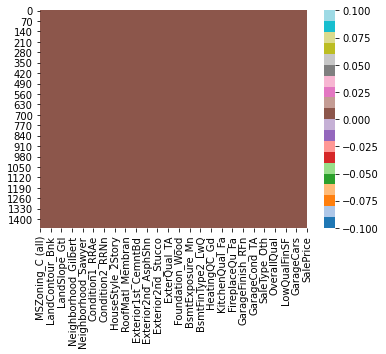

In [22]:
sns.heatmap(data=data_train.isnull(),cmap="tab20")

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 276 entries, MSZoning_C (all) to SalePrice
dtypes: float64(37), uint8(239)
memory usage: 762.9 KB


In [24]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [25]:
df5=pd.DataFrame()
df5['Id']=data_test['Id']
data_test=data_test.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])

In [26]:
df1=pd.DataFrame()
df2=pd.DataFrame()
l=[]
r=[]
for i in data_test:
  if(np.dtype(data_test[i])=='object'):
    l.append(i)
    df1[i]=data_test[i]
  else:
    df2[i]=data_test[i]
    if(np.dtype(data_test[i])=='int64'):
      r.append(i)

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df2)
imputed = pd.DataFrame(imp_mean.transform(df2))
imputed.columns = df2.columns
df2=imputed
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0


In [28]:
df3=pd.get_dummies(df1)
data_test=df3.join(df2)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 259 entries, MSZoning_C (all) to YrSold
dtypes: float64(36), uint8(223)
memory usage: 728.2 KB


<AxesSubplot:>

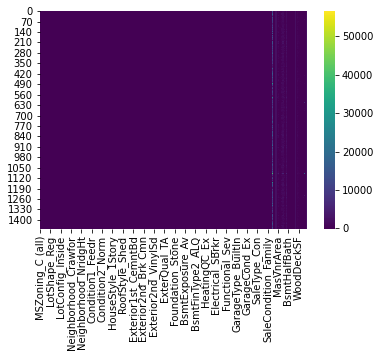

In [29]:
sns.heatmap(data=data_test,cmap='viridis')

In [30]:
data_test.isnull().sum()

MSZoning_C (all)    0
MSZoning_FV         0
MSZoning_RH         0
MSZoning_RL         0
MSZoning_RM         0
                   ..
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
Length: 259, dtype: int64

In [31]:
r=[]
for i in data_test:
  r.append(i)

In [32]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 259 entries, MSZoning_C (all) to YrSold
dtypes: float64(36), uint8(223)
memory usage: 728.2 KB


In [33]:
r.append("SalePrice")

In [34]:
data_train=data_train[r]

## ***Feature Selection***

In [35]:
l=abs(data_train.corr()["SalePrice"][abs(data_train.corr()["SalePrice"])>0.05].drop('SalePrice')).index.tolist()
data_train=data_train[l]
data_train.to_csv("imputed.csv")
data_train=data_train.join(target)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 173 entries, MSZoning_C (all) to SalePrice
dtypes: float64(30), uint8(143)
memory usage: 546.2 KB


In [36]:
data_test=data_test[l]

In [37]:
data_test.info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 172 entries, MSZoning_C (all) to PoolArea
dtypes: float64(29), uint8(143)
memory usage: 534.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 173 entries, MSZoning_C (all) to SalePrice
dtypes: float64(30), uint8(143)
memory usage: 546.2 KB


In [38]:
x = data_train.drop(['SalePrice'], axis=1)
y = data_train['SalePrice']
z = data_test

# **Modeling**

# ***XGBoost***

In [39]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=4,learning_rate=0.11,colsample_bytree=1,gamma=0.01)
xgb.fit(x, y)
xgb_pred = xgb.predict(z)
final_xgb=pd.DataFrame()
final_xgb['SalePrice'] = xgb_pred

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [40]:
final=pd.DataFrame()
final['Id'] = df5['Id']

In [41]:
final=final.join(final_xgb)

In [42]:
final.tail()

,Id,SalePrice
1454,2915,81630.492188
1455,2916,79807.734375
1456,2917,164641.593750
1457,2918,121324.773438
1458,2919,218088.640625


In [43]:
final.to_csv("Royal_Xgboost.csv",index=False)

In [44]:
np.dtype(final['SalePrice'])

dtype('float32')

In [45]:
final.info()
final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


,Id,SalePrice
0,1461,123852.429688
1,1462,152736.093750
2,1463,180676.093750
3,1464,191375.031250
4,1465,192646.250000


# CatBoost

In [46]:
!pip install catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=2000)
cat.fit(x, y)
pred_cat = cat.predict(z)
final_cat=pd.DataFrame()
final_cat['SalePrice'] = pred_cat

Learning rate set to 0.024653
0:	learn: 78157.8181947	total: 57.4ms	remaining: 1m 54s
1:	learn: 77084.1391548	total: 64.1ms	remaining: 1m 4s
2:	learn: 75927.7684708	total: 69.9ms	remaining: 46.5s
3:	learn: 74717.1445569	total: 75.5ms	remaining: 37.7s
4:	learn: 73551.5874345	total: 81ms	remaining: 32.3s
5:	learn: 72404.9874720	total: 85.7ms	remaining: 28.5s
6:	learn: 71287.9627488	total: 90.6ms	remaining: 25.8s
7:	learn: 70195.2709597	total: 95.7ms	remaining: 23.8s
8:	learn: 69194.3595940	total: 101ms	remaining: 22.3s
9:	learn: 68226.3420234	total: 105ms	remaining: 21s
10:	learn: 67208.0073472	total: 110ms	remaining: 19.9s
11:	learn: 66231.7138591	total: 115ms	remaining: 19s
12:	learn: 65297.7575035	total: 120ms	remaining: 18.4s
13:	learn: 64390.0201807	total: 125ms	remaining: 17.7s
14:	learn: 63434.5700044	total: 130ms	remaining: 17.2s
15:	learn: 62437.0458538	total: 135ms	remaining: 16.7s
16:	learn: 61653.0959202	total: 140ms	remaining: 16.3s
17:	learn: 60722.0207451	total: 145ms	rema

In [47]:
final=pd.DataFrame()
final['Id'] = df5['Id']

In [48]:
final=final.join(final_cat)

In [49]:
final.to_csv("Royal_CatBoost.csv",index=False)

In [50]:
final.info()
final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


,Id,SalePrice
0,1461,124605.300923
1,1462,163291.718294
2,1463,188372.174759
3,1464,193398.281290
4,1465,183202.935803
